# Data Analysis and Exploration

Mouting Google Drive in Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [20]:
import polars as pl
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets
import folium
import ee
import geemap

Data directory and csv files

In [3]:
data_dir = '/content/drive/MyDrive/LIAM/Fire_Project/AI_project/data/raw/csv_NASA/modis/instrument_modis_2000-2024'
files = glob.glob(data_dir + '/*.csv')

Authentication to GEE focusing on MADAGASCAR

In [21]:
ee.Authenticate()
ee.Initialize(project='ee-kaloina4')  # 'ee-kaloina4' is the project name in GEE
pays = ee.FeatureCollection("FAO/GAUL/2015/level0");
madagascar = pays.filter(ee.Filter.eq('ADM0_NAME', 'Madagascar'));

## FRP max per year
FRP : Fire Radiative Power, measure of the energy emitted by a fire, expressed in MegaWatts(MW)

In [24]:
frp_result_df = pl.DataFrame()
for file in files:
    df = pl.read_csv(file, separator=';')
    max_frp_row = df.filter(pl.col('frp') == pl.col('frp').max())
    max_frp_row = max_frp_row.with_columns(pl.lit(file[-19:][:4]).alias("Year").cast(pl.Int64))
    frp_result_df = pl.concat([frp_result_df, max_frp_row])
frp_result_df=frp_result_df.select(["Year","latitude","longitude","brightness","acq_date","acq_time","frp"])
frp_result_df=frp_result_df.sort("Year")
pl.Config.set_tbl_rows(25)
frp_result_df

Year,latitude,longitude,brightness,acq_date,acq_time,frp
i64,f64,f64,f64,str,i64,f64
2000,-22.4038,43.4728,388.2,"""14/11/2000""",800,495.5
2001,-21.2541,46.8833,409.1,"""28/09/2001""",2015,1548.3
2002,-23.1536,44.0686,419.4,"""09/08/2002""",1024,1214.8
2003,-23.9023,47.4204,412.6,"""26/10/2003""",1003,1461.5
2004,-18.5298,48.2132,499.8,"""11/12/2004""",1030,1586.1
2005,-19.6256,44.647,497.0,"""31/08/2005""",1035,1843.9
2006,-17.7924,47.8965,452.3,"""26/10/2006""",1057,1899.3
2007,-15.2224,46.9336,427.6,"""27/09/2007""",1057,1081.4
2008,-19.2359,44.4757,415.6,"""21/09/2008""",1010,2618.4


On a map

In [25]:
Mapf=geemap.Map()
Mapf.add_basemap('SATELLITE')
Mapf.addLayer(madagascar, {'color': 'black'}, "Madagascar")
Mapf.centerObject(madagascar,5)

for row in frp_result_df.iter_rows():
  popup_html = ipywidgets.HTML(f"Year: {row[0]}")
  Mapf.add_marker(location=[row[1], row[2]],
                 popup=popup_html)

In [26]:
Mapf

Map(center=[-19.335922158747394, 46.7382233762819], controls=(WidgetControl(options=['position', 'transparent_…

## Brightness max per year
Brightness temperature of a fire pixel, measured in Kelvin(K)

In [11]:
brightness_result_df = pl.DataFrame()
for file in files:
    df = pl.read_csv(file, separator=';')
    max_brightness_row = df.filter(pl.col('brightness') == pl.col('brightness').max())
    max_brightness_row = max_brightness_row.with_columns(pl.lit(file[-19:][:4]).alias("Year").cast(pl.Int64))
    brightness_result_df = pl.concat([brightness_result_df, max_brightness_row])
brightness_result_df=brightness_result_df.select(["Year","latitude","longitude","brightness","acq_date","acq_time","frp"])
brightness_result_df=brightness_result_df.sort("Year")
pl.Config.set_tbl_rows(25)
brightness_result_df

Year,latitude,longitude,brightness,acq_date,acq_time,frp
i64,f64,f64,f64,str,i64,f64
2000,-15.3634,46.7413,392.0,"""04/11/2000""",722,205.8
2001,-17.2682,45.7978,415.6,"""14/06/2001""",730,375.8
2002,-24.7743,44.2138,455.7,"""24/10/2002""",1047,793.0
2003,-22.3805,47.0132,476.3,"""11/10/2003""",1047,1331.2
2004,-18.5298,48.2132,499.8,"""11/12/2004""",1030,1586.1
2005,-19.6256,44.647,497.0,"""31/08/2005""",1035,1843.9
2006,-16.1782,47.0001,498.1,"""28/09/2006""",1033,1581.4
2007,-22.195,46.8522,469.2,"""13/09/2007""",1043,1007.8
2008,-19.233,44.4751,488.9,"""20/09/2008""",1105,2077.1


On a map

In [22]:
Mapb=geemap.Map()
Mapb.add_basemap('SATELLITE')
Mapb.addLayer(madagascar, {'color': 'black'}, "Madagascar")
Mapb.centerObject(madagascar,5)

for row in brightness_result_df.iter_rows():
  popup_html = ipywidgets.HTML(f"Year: {row[0]}")
  Mapb.add_marker(location=[row[1], row[2]],
                 popup=popup_html)

In [23]:
Mapb

Map(center=[-19.335922158747394, 46.7382233762819], controls=(WidgetControl(options=['position', 'transparent_…

## Mean daily fire pixel count per year

In [5]:
daily_fire_df = pl.DataFrame()
for file in files:
    df = pl.read_csv(file, separator=';')
    df = df.group_by('acq_date').agg(pl.len())
    df = df.with_columns(pl.lit(file[-19:][:4]).alias("Year").cast(pl.Int64))
    daily_fire_df = pl.concat([daily_fire_df, df])

daily_fire_df = daily_fire_df.group_by('Year').agg(pl.col('len').mean())
pl.Config.set_tbl_rows(25)
daily_fire_df.sort('Year')

Year,len
i64,f64
2000,24.04
2001,84.266423
2002,132.89701
2003,196.823708
2004,132.067055
2005,211.632312
2006,166.763848
2007,201.307463
2008,159.017341


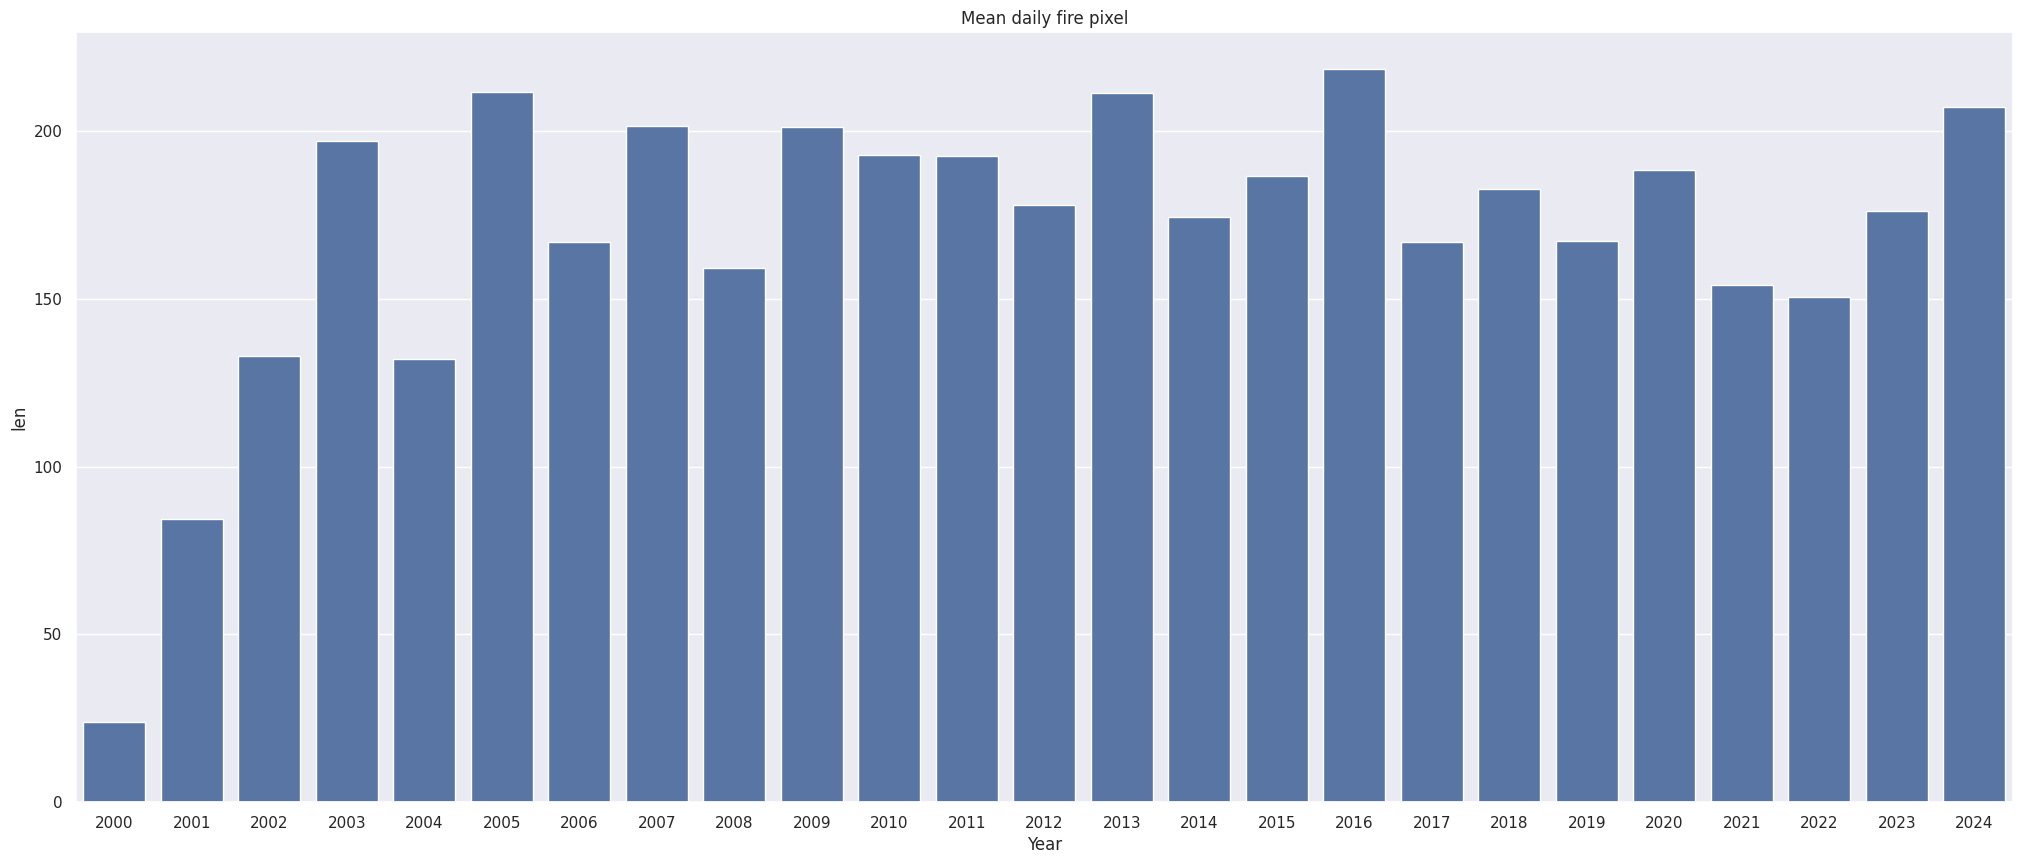

In [27]:
sns.set()
plt.figure(figsize=(25,10))
sns.barplot(x='Year', y='len', data=daily_fire_df)
plt.title('Mean daily fire pixel')
plt.show()